# k-means clustering silhouette analysis

## SemEval data

In [3]:
import os
# set available gpu's
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [4]:
from data_clustering import text_semeval
from evo_functions import extract_SemEval_data, embed_texts

/cfs/home/u023967/miniconda3/envs/thesis_env_2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [5]:
data = extract_SemEval_data(use_data_sorted_by_dq=True)
text_constructor = text_semeval

Used data with already retrieved examples from DATASETS/DATA_QUALITY/SemEval_data_quality.json


In [6]:
texts=[]
for example in data:
    text = text_constructor(example)
    #print(text)
    texts.append(text)

# embed texts
embeded_texts = embed_texts(texts)

In [7]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [8]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = embeded_texts
range_n_clusters = range(2,300)

silhouette_scores = {}
for n_clusters in range_n_clusters:
    """# Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])"""

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_scores[n_clusters] = silhouette_avg

"""    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()"""

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


For n_clusters = 2 The average silhouette_score is : 0.17310938
For n_clusters = 3 The average silhouette_score is : 0.15109384
For n_clusters = 4 The average silhouette_score is : 0.15662928
For n_clusters = 5 The average silhouette_score is : 0.103863806
For n_clusters = 6 The average silhouette_score is : 0.10140801
For n_clusters = 7 The average silhouette_score is : 0.08924103
For n_clusters = 8 The average silhouette_score is : 0.043074775
For n_clusters = 9 The average silhouette_score is : 0.03426676
For n_clusters = 10 The average silhouette_score is : 0.03370533
For n_clusters = 11 The average silhouette_score is : 0.03749121
For n_clusters = 12 The average silhouette_score is : 0.03915703
For n_clusters = 13 The average silhouette_score is : 0.040454797
For n_clusters = 14 The average silhouette_score is : 0.04291414
For n_clusters = 15 The average silhouette_score is : 0.04304257
For n_clusters = 16 The average silhouette_score is : 0.043415822
For n_clusters = 17 The avera

'    # Compute the silhouette scores for each sample\n    sample_silhouette_values = silhouette_samples(X, cluster_labels)\n\n    y_lower = 10\n    for i in range(n_clusters):\n        # Aggregate the silhouette scores for samples belonging to\n        # cluster i, and sort them\n        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]\n\n        ith_cluster_silhouette_values.sort()\n\n        size_cluster_i = ith_cluster_silhouette_values.shape[0]\n        y_upper = y_lower + size_cluster_i\n\n        color = cm.nipy_spectral(float(i) / n_clusters)\n        ax1.fill_betweenx(\n            np.arange(y_lower, y_upper),\n            0,\n            ith_cluster_silhouette_values,\n            facecolor=color,\n            edgecolor=color,\n            alpha=0.7,\n        )\n\n        # Label the silhouette plots with their cluster numbers at the middle\n        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))\n\n        # Compute the new y_lower for nex

In [9]:
silhouette_scores

{2: 0.17310938,
 3: 0.15109384,
 4: 0.15662928,
 5: 0.103863806,
 6: 0.10140801,
 7: 0.08924103,
 8: 0.043074775,
 9: 0.03426676,
 10: 0.03370533,
 11: 0.03749121,
 12: 0.03915703,
 13: 0.040454797,
 14: 0.04291414,
 15: 0.04304257,
 16: 0.043415822,
 17: 0.042796794,
 18: 0.041832186,
 19: 0.041401315,
 20: 0.041380044,
 21: 0.03996049,
 22: 0.04058523,
 23: 0.04026363,
 24: 0.041690327,
 25: 0.04176718,
 26: 0.04110986,
 27: 0.040332746,
 28: 0.037485007,
 29: 0.03814629,
 30: 0.037678678,
 31: 0.039732482,
 32: 0.039570495,
 33: 0.04019561,
 34: 0.041459687,
 35: 0.040976766,
 36: 0.042516712,
 37: 0.04419525,
 38: 0.04403076,
 39: 0.0445047,
 40: 0.045481045,
 41: 0.04790316,
 42: 0.049726754,
 43: 0.04983566,
 44: 0.050010696,
 45: 0.047123335,
 46: 0.04784925,
 47: 0.04844721,
 48: 0.047617625,
 49: 0.04961858,
 50: 0.05099869,
 51: 0.05149596,
 52: 0.052713983,
 53: 0.05328186,
 54: 0.054296907,
 55: 0.058896486,
 56: 0.057322927,
 57: 0.05811942,
 58: 0.058207493,
 59: 0.058751

In [13]:
max_key = max(silhouette_scores, key=silhouette_scores.get)
max_value = silhouette_scores[max_key]

print(max_key, max_value)

299 0.23834296


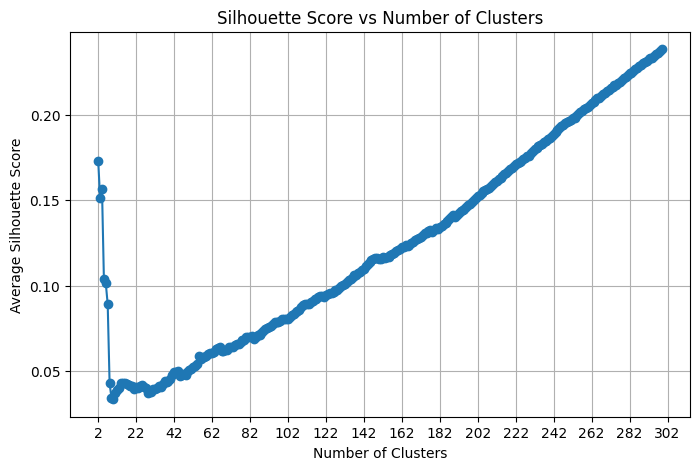

In [19]:
# Extract the number of clusters and the corresponding silhouette scores
clusters = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(clusters, scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.xticks(np.arange(min(clusters), max(clusters)+20, 20)) 
plt.show()
